**PROJECT NAME :** Bank Loan Approval Patterns (Basic Data Analysis)

**PROJECT DOMAIN :** FINANCE

**PREPARED BY :** P. V. N. S. HASINI

**PROBLEM STATEMENT :**

Loan default rates are strongly influenced by applicant characteristics such as income, employment, marital status, education, credit history. However, loan approval processes may sometimes rely on inconsistent or biased judgment rather than data-driven insights.

**OBJECTIVE :**

To identify the key factors that influence loan approval decisions and uncover hidden patterns in applicant profiles.


*  Understand approval trends
*  Detect income and loan amount relationships
*  Assess credit history impact
*  Spot demographic patterns
*  Visualize correlations
*  Guide decision-making

**INSTALL LIBRARIES**

In [1]:
!pip install plotly seaborn
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

**UPLOAD THE DATASET (KAGGLE)**

In [2]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
df = pd.read_csv("loan_approval_dataset.csv")

# Clean column names
df.columns = df.columns.str.strip()
df.head()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (4269, 13)


**STATISTICS OF THE DATASET**

In [ ]:
print(df.describe())

           loan_id  no_of_dependents  income_annum   loan_amount    loan_term  \
count  4269.000000       4269.000000  4.269000e+03  4.269000e+03  4269.000000   
mean   2135.000000          2.498712  5.059124e+06  1.513345e+07    10.900445   
std    1232.498479          1.695910  2.806840e+06  9.043363e+06     5.709187   
min       1.000000          0.000000  2.000000e+05  3.000000e+05     2.000000   
25%    1068.000000          1.000000  2.700000e+06  7.700000e+06     6.000000   
50%    2135.000000          3.000000  5.100000e+06  1.450000e+07    10.000000   
75%    3202.000000          4.000000  7.500000e+06  2.150000e+07    16.000000   
max    4269.000000          5.000000  9.900000e+06  3.950000e+07    20.000000   

       cibil_score  residential_assets_value  commercial_assets_value  \
count  4269.000000              4.269000e+03             4.269000e+03   
mean    599.936051              7.472617e+06             4.973155e+06   
std     172.430401              6.503637e+06       

**DISPLAY THE MISSING VALUES**

In [ ]:
print("Missing Values:\n")
print(df.isnull().sum())

Missing Values:

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


**LOAN STATUS DISTRIBUTION : BAR CHART**

Shows how many applicants got approved vs rejected.

In [ ]:
fig1 = px.bar(df, x="loan_status", title="Loan Status Distribution", color="loan_status")
fig1.show()

**Education distribution : Pie Chart**

Displays the proportion of Graduate vs Non-Graduate applicants.

In [ ]:
fig2 = px.pie(df, names="education", title="Education Distribution", hole=0.3)
fig2.show()

**Income vs Loan Amount : Scatter Plot**

Reveals relationship between applicant income and loan amount.

In [ ]:
fig3 = px.scatter(df, x="income_annum", y="loan_amount",
                  color="loan_status", size="cibil_score",
                  hover_data=["education"],
                  title="Income vs Loan Amount by Loan Status")
fig3.show()

**Loan Amount by Education : Box Plot**

Compares loan amounts across education levels.

In [ ]:
fig4 = px.box(df, x="education", y="loan_amount", color="loan_status",
              title="Loan Amount Distribution by Education")
fig4.show()

**CIBIL SCORE : Histogram**

Highlights the distribution of credit scores.

In [ ]:
fig5 = px.histogram(df, x="cibil_score", nbins=40, color="loan_status",
                    marginal="box", title="CIBIL Score Distribution")
fig5.show()

**CORRELATION MATRIX : HEATMAP**

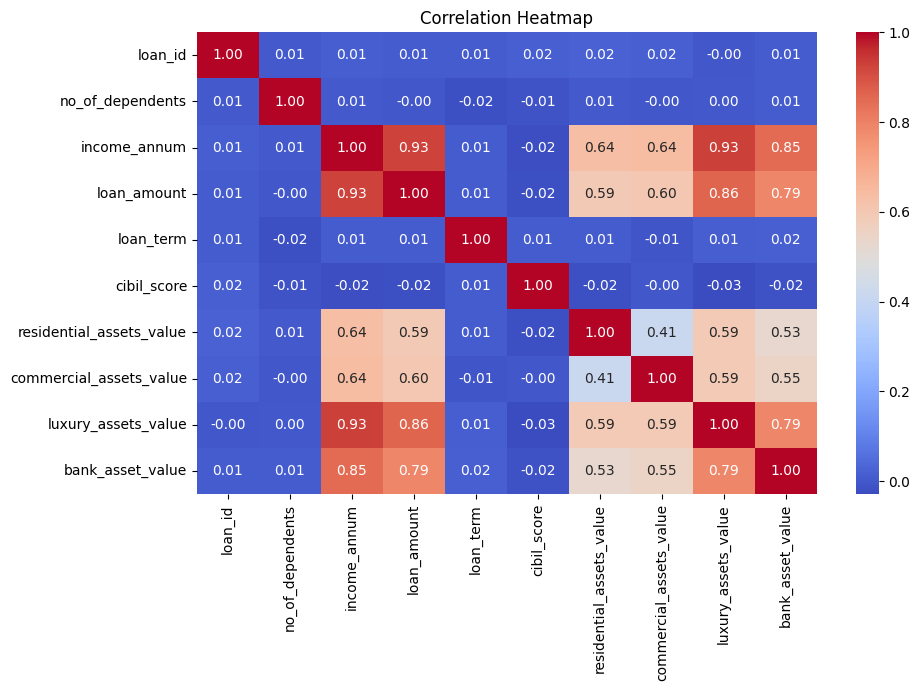

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**INCOME VS ASSETS : Bubble Chart**

In [ ]:
fig6 = px.scatter(df, x="income_annum", y="residential_assets_value",
                  size="loan_amount", color="loan_status",
                  hover_data=["cibil_score"],
                  title="Income vs Residential Assets (Bubble size = Loan Amount)")
fig6.show()

**🔎 Final Conclusion**

**CIBIL score** is the most critical factor — applicants with higher credit scores are far more likely to be approved.

**Income and asset values**  show a strong positive relationship with loan approval, reflecting financial stability.

**Education level** plays a role, with graduates generally applying for and receiving higher loan amounts compared to non-graduates.

A significant portion of loan rejections are linked to lower CIBIL scores, lower income, and fewer assets.

**Overall, the key predictors of loan approval are creditworthiness (CIBIL score), financial strength (income and assets), and to a lesser extent, educational background.**